# Intelligent Student Performance Analytics & Prediction System

## Objective
The objective of this project is to analyze student academic and behavioral data, identify key factors affecting performance, and predict the final grade (G3) using Machine Learning techniques.

- This system can help teachers identify at-risk students early and provide timely academic support.


## Problem Statement

- Many students struggle academically due to various social, personal, and academic factors. Educational institutions often fail to identify weak students early.

- This project aims to analyze student data and build a predictive model to forecast final performance so that timely intervention can be provided.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score

## Libraries Used
- Pandas → Data handling and analysis
- NumPy → Numerical operations
- Matplotlib → Data visualization
- Seaborn → Advanced data visualization
- Scikit-learn → Machine Learning model building and evaluation

In [51]:
student_data = pd.read_csv(r"C:\Users\Admin\student-performance-analysis\data\student_data.csv")
student_data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [52]:
student_data.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [53]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   gender      395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [54]:
student_data.shape

(395, 33)

In [55]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Dataset Information

- The dataset contains student academic and personal attributes.
- It includes both numerical and categorical variables.
- The data will be used to analyze performance and predict the final grade.


In [56]:
student_data.isnull().sum()

school        0
gender        0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Missing Values Check

The dataset does not contain missing values and is ready for analysis.


In [57]:
corr_with_g3 = student_data.corr(numeric_only=True)["G3"].sort_values(ascending=False)
corr_with_g3

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

### Insight

This shows how strongly each numeric feature is related to the final grade (G3).
Higher values indicate stronger impact on student performance.

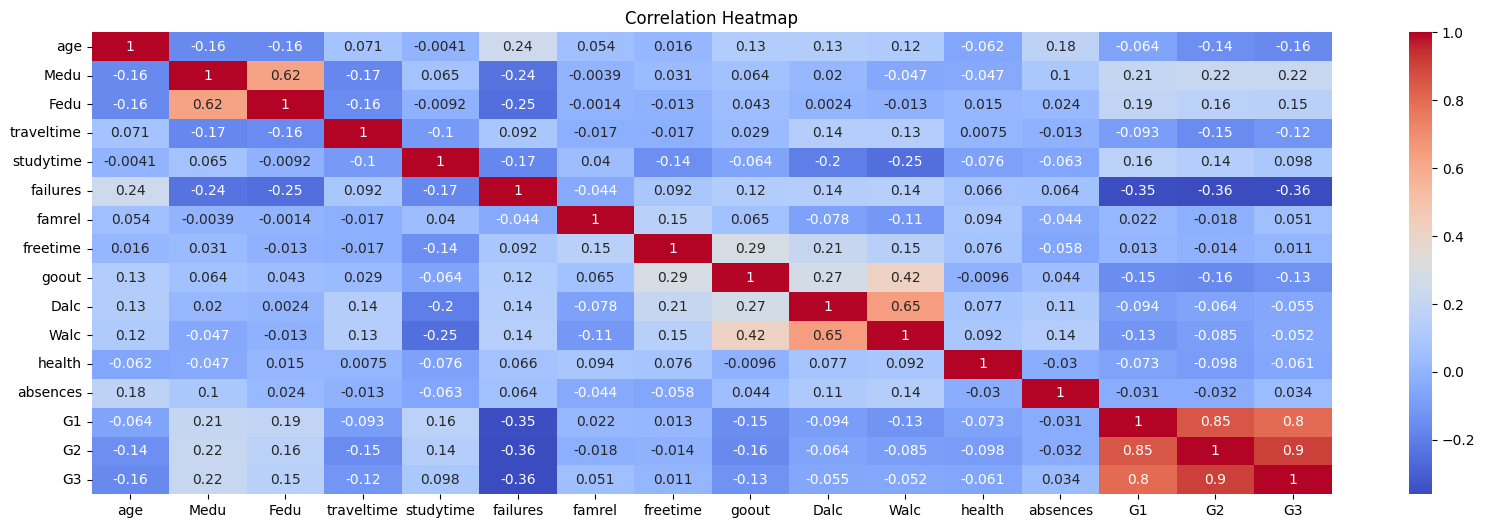

In [58]:
## Correlation Heatmap
plt.figure(figsize=(20,6))
sns.heatmap(student_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Insight

The heatmap shows relationships between different student features.
G1 and G2 are highly correlated with G3.     
This means previous grades are strong predictors of the final grade.

In [59]:
print(student_data["gender"].head())
print(student_data["gender"].dtype)

0    F
1    F
2    F
3    F
4    F
Name: gender, dtype: object
object


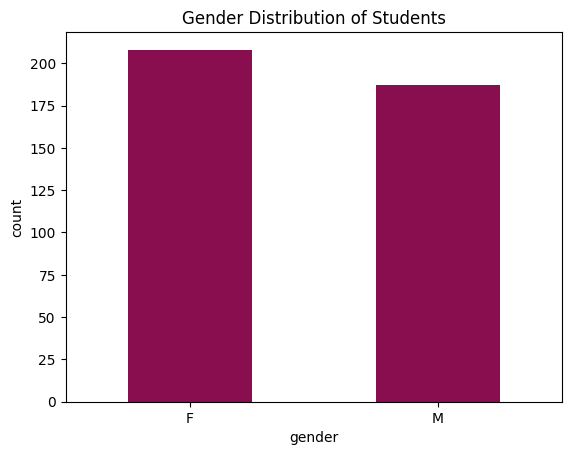

In [60]:
#Gender Distribution

student_data["gender"].value_counts().plot(kind="bar",color="#880e4f")
plt.title("Gender Distribution of Students")
plt.xlabel("gender")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

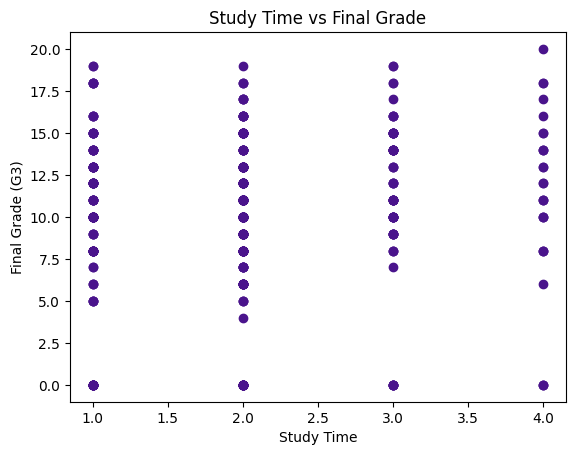

In [61]:
#Study Time vs Final Grade

plt.scatter(student_data["studytime"], student_data["G3"], color="#4a148c")
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

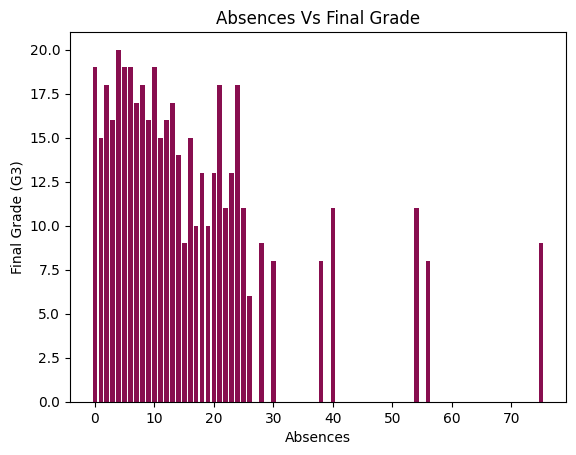

In [62]:
#Absences vs Final Grade

plt.bar(student_data["absences"],student_data["G3"],color="#880e4f")
plt.title("Absences Vs Final Grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade (G3)")
plt.show()

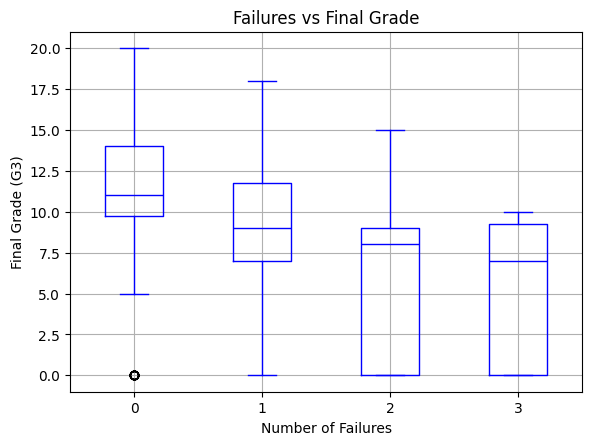

In [63]:
#Previous Failures vs Final Grade

student_data.boxplot(column="G3", by="failures",color="blue")
plt.title("Failures vs Final Grade")
plt.suptitle("")
plt.xlabel("Number of Failures")
plt.ylabel("Final Grade (G3)")
plt.show()

# Insights from EDA
## Key Observations
- Students with higher study time tend to achieve better final grades
- More absences generally lead to lower performance
- Students with previous failures have lower final scores
- Internal assessment marks (G1 & G2) strongly affect final grade (G3)

# Feature Selection

The following features are selected because they show strong relation with
the final grade:

- studytime
- failures
- absences
- G1 (first period grade)
- G2 (second period grade)

## Feature Engineering

We create an average grade feature using G1, G2, and G3 to better understand overall student performance.


In [64]:
student_data['avg_grade'] = (student_data['G1'] + student_data['G2']) / 2
student_data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,7.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.0
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.0
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,9.0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.5


In [65]:
X= student_data[["studytime","failures","absences","G1","G2"]]
y=student_data["G3"]

These features were selected because they show strong correlation with student performance.

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [68]:
y_pred= model.predict(X_test)

In [69]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("R2 Score :", r2)

MAE : 1.339415908267092
MSE : 4.466503212015604
R2 Score : 0.7821754247320556


- Mean Absolute Error (MAE) shows the average prediction error
- Shows the average squared difference between predicted and actual values.
- R² Score indicates how well the model explains the data (closer to 1 = better)

In [70]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df

,Feature,Coefficient
0,studytime,-0.071231
1,failures,-0.455813
2,absences,0.039245
3,G1,0.144463
4,G2,0.979615


### Insight

- Positive coefficient means the feature increases the final grade.   
- Negative coefficient means the feature decreases the final grade.

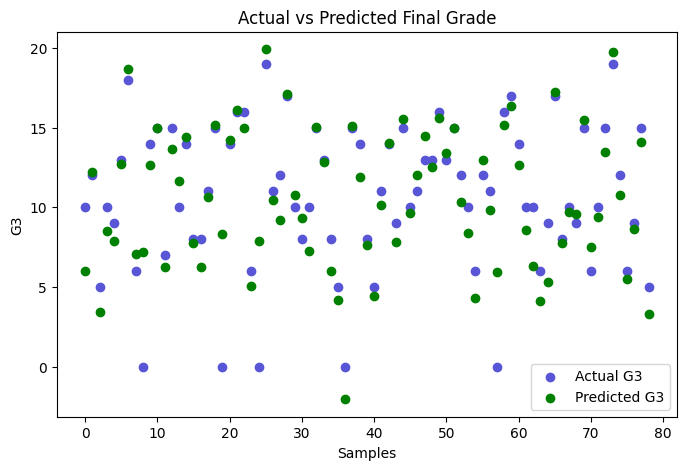

In [71]:
#Actual vs Predicted Final Grade
plt.figure(figsize=(8,5))
x_axis = range(len(y_test))
plt.scatter(x_axis,y_test.values, color='#5856d6', label='Actual G3')      # Actual values
plt.scatter(x_axis,y_pred, color='green', label='Predicted G3')         # Predicted values
plt.xlabel("Samples")
plt.ylabel("G3")
plt.title("Actual vs Predicted Final Grade")
plt.legend()
plt.show()

### Insight

- If the points are close to a straight line, the model predictions are close to the actual values.
- This graph shows the performance of the prediction model.

In [74]:
sample_student = pd.DataFrame({
    "studytime": [3],
    "failures": [0],
    "absences": [6],
    "G1": [14],
    "G2": [16]
})

model.predict(sample_student)

array([16.09679747])

## Conclusion

This project analyzed student performance using academic and behavioral data. Exploratory data analysis revealed that factors such as study time, absences, and previous failures significantly impact final grades.

Machine learning models were used to predict student performance, and the model demonstrated that final grades can be predicted with good accuracy using historical data. This system can help teachers identify at-risk students early and provide targeted academic support.
